In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

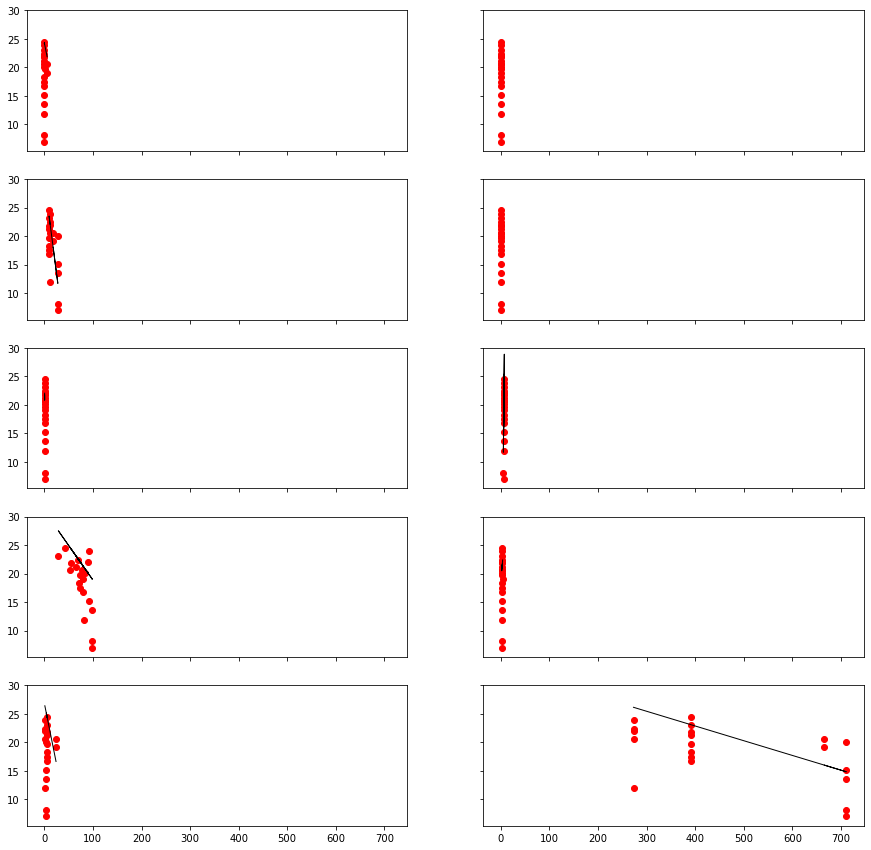

In [2]:
boston = datasets.load_boston()
f, axarr = plt.subplots(5,2, sharex=True, sharey=True,figsize=(15,15))
for i in range(0,5):
    for j in range(0,2):
        boston_X = boston.data[:, np.newaxis, i*2+j]
        
        boston_dataset_X_train = boston_X[:-20]
        boston_dataset_X_test = boston_X[-20:]
        
        boston_dataset_y_train = boston.target[:-20]
        boston_dataset_y_test = boston.target[-20:]
        
        regr = linear_model.LinearRegression()
        
        regr.fit(boston_dataset_X_train, boston_dataset_y_train)
        
        axarr[i,j].scatter(boston_dataset_X_test, boston_dataset_y_test,  color='red')
        axarr[i,j].plot(boston_dataset_X_test, regr.predict(boston_dataset_X_test), color='black', linewidth=1)
plt.show()

In [3]:
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_Y = diabetes.target
diabetes_X_train = diabetes_X[:-50]
diabetes_X_test = diabetes_X[-50:]
diabetes_y_train = diabetes_Y[:-50]
diabetes_y_test = diabetes_Y[-50:]

In [4]:
regressors = {}
regressors['LinReg'] = linear_model.LinearRegression()
regressors['Ridge'] = linear_model.Ridge(alpha = .5)
regressors['Lasso'] = linear_model.Lasso(alpha = 5.1)
regressors['ElNet'] = linear_model.ElasticNet(alpha = .5, l1_ratio=0.5)
fit_results={}
for key in regressors:
    regr = regressors[key]
    regr.fit(diabetes_X_train, diabetes_y_train)
    mse = np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)
    w = regr.coef_
    wl1 = np.sum(np.abs(w))
    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key]= { 'mse': mse, 'wl2': wl2, 'wl1': wl1, 'w': w}
    print("{}\n----------\n  mse={}\n  wl1={}\n  wl2={}\n  w={}\n ".format(key,mse,wl1,wl2,w))

LinReg
----------
  mse=1789.5698810318208
  wl1=3260.703769182654
  wl2=1274.171756925127
  w=[   1.19680495 -233.50366519  519.88450429  304.48097981 -726.44619916
  415.80697199   83.01061117  203.1648289   667.92936385  105.27983988]
 
Ridge
----------
  mse=2384.1858647392587
  wl1=1511.0823340013712
  wl2=589.1449165292609
  w=[  23.62740295 -119.32265523  362.44657362  222.30799722  -11.56467397
  -45.46192157 -169.43933329  129.82831679  292.72970213  134.35375724]
 
Lasso
----------
  mse=5912.974117294878
  wl1=0.0
  wl2=0.0
  w=[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
 
ElNet
----------
  mse=5781.123148775016
  wl1=39.063433331886635
  wl2=14.336395063161204
  w=[ 1.48801264  0.          7.23427291  4.94114391  2.19772301  1.7139797
 -4.52179996  5.31415092  6.88097675  4.77137353]
 


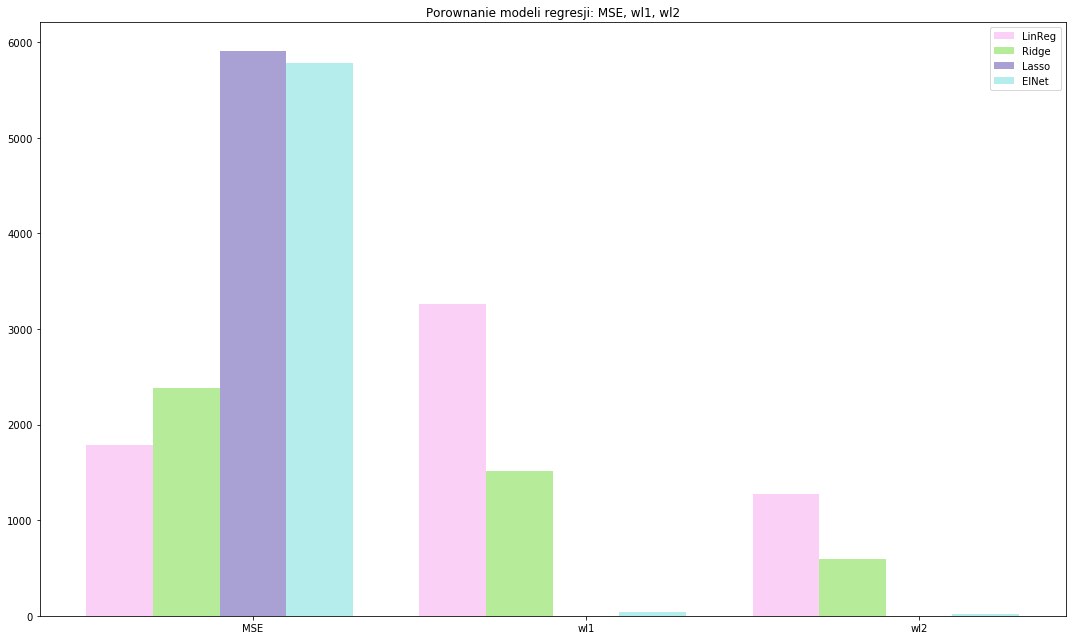

In [5]:
#utworzenie wykresów błedu regresji
groups = 3 
index = np.arange(groups)
bar_width = .2
opacity = 0.4

fig, ax = plt.subplots(figsize=(15,9))

t=0
for key in regressors:
    results = fit_results[key]
    res_val = (results['mse'],results['wl1'],results['wl2'])
    plt.bar(index+ bar_width*t, res_val, bar_width,
                 alpha=opacity,
                 color=np.random.rand(1,3),
                 label=key)
    t+=1
plt.title('Porownanie modeli regresji: MSE, wl1, wl2')
plt.xticks(index + (t-2)*bar_width, ('MSE', 'wl1', 'wl2'))
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

In [7]:
malzenstwo = pd.read_csv('malzenstwo.csv', sep=' ', encoding='iso-8859-1')

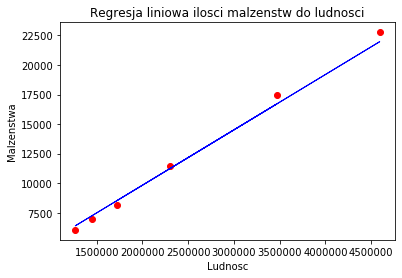

In [8]:
malzenstwo_X_train = malzenstwo.ludnosc[:10]
malzenstwo_X_test = malzenstwo.ludnosc[10:]
malzenstwo_Y_train = malzenstwo.malzenstwa[:10]
malzestwo_Y_test = malzenstwo.malzenstwa[10:]

regr = linear_model.LinearRegression()


regr.fit(malzenstwo_X_train.values.reshape(-1,1), malzenstwo_Y_train.values.reshape(-1,1))

plt.scatter(malzenstwo_X_test.values, malzestwo_Y_test.values,  color='red')
plt.plot(malzenstwo_X_test, regr.predict(malzenstwo_X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa ilosci malzenstw do ludnosci')
plt.xlabel('Ludnosc')
plt.ylabel('Malzenstwa')
plt.show()

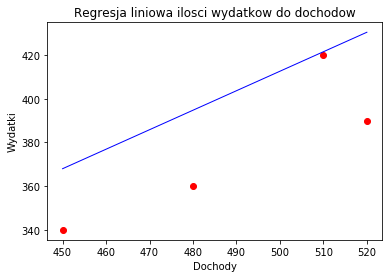

In [9]:
wydatki_csv = pd.read_csv('wydatki.csv', sep=' ')
dochody = wydatki_csv.dochody
wydatki = wydatki_csv.wydatki
X_train = dochody[:6]
X_test = dochody[6:]
Y_train = wydatki[:6]
Y_test = wydatki[6:]

regr = linear_model.LinearRegression()
regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))

plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa ilosci wydatkow do dochodow')
plt.xlabel('Dochody')
plt.ylabel('Wydatki')
plt.show()

In [10]:
numbers = np.random.uniform(0,1,size=(2,100))
print('Średnie dla x oraz y')
avg_X = numbers[0,:].mean()
avg_Y = numbers[1,:].mean()
print('Srednie X: ',avg_X)
print('Srednie Y: ',avg_Y)

Średnie dla x oraz y
Srednie X:  0.5437102324213462
Srednie Y:  0.4356806912421148


In [11]:
#nastepnie dla kazdego x odejmujemy nasz avg_X(tak samo dla y)
roznica_X = np.array([x - avg_X for x in numbers[0,:]])
roznica_Y = np.array([y - avg_Y for y in numbers[1,:]])
print('Roznice w X',roznica_X)
print('Roznice w Y',roznica_Y)

Roznice w X [ 0.06900183 -0.24288047  0.12941399  0.16088839  0.43100948 -0.1049948
  0.10981406 -0.48781106  0.10216218  0.04977875 -0.09938972 -0.31056859
  0.42256293 -0.5224429   0.23282906  0.37567517 -0.34842794  0.22106665
 -0.24011071  0.04420981 -0.35376971  0.27136694 -0.3174022  -0.06852305
  0.4328071  -0.34995032  0.20838189  0.27424738 -0.2712491   0.16246542
 -0.14194597 -0.50583434 -0.46342878  0.38204958  0.17895743  0.26882946
 -0.0271527  -0.5428554  -0.29199677  0.16897777  0.37990949  0.34227388
  0.36572376  0.36158224 -0.23580417  0.04335402 -0.13517429 -0.44209274
  0.23692311 -0.42641574 -0.18003769 -0.47560007 -0.40455042  0.11397706
  0.36346984 -0.25593138  0.16910361 -0.40127948 -0.06138896  0.03711221
  0.0478356   0.2126166   0.45386589  0.03191521 -0.06991435  0.44495202
  0.2770153  -0.2837882   0.40574814 -0.12513292  0.03346871  0.4552398
 -0.08383705 -0.3858245   0.15623483  0.21388893 -0.29634135 -0.0931874
  0.44356277  0.1568268  -0.02891829  0.34

In [12]:
print('Kwadrat powyższych wartości')
roznica_X_kwadrat = np.square(roznica_X)
roznica_Y_kwadrat = np.square(roznica_Y)
print('Kwadrat roznicy X: ',roznica_X_kwadrat)
print('Kwadrat roznicy Y: ',roznica_Y_kwadrat)

Kwadrat powyższych wartości
Kwadrat roznicy X:  [4.76125237e-03 5.89909248e-02 1.67479809e-02 2.58850752e-02
 1.85769176e-01 1.10239085e-02 1.20591275e-02 2.37959632e-01
 1.04371107e-02 2.47792364e-03 9.87831637e-03 9.64528511e-02
 1.78559428e-01 2.72946583e-01 5.42093698e-02 1.41131837e-01
 1.21402026e-01 4.88704651e-02 5.76531552e-02 1.95450763e-03
 1.25153011e-01 7.36400180e-02 1.00744159e-01 4.69540896e-03
 1.87321989e-01 1.22465228e-01 4.34230102e-02 7.52116248e-02
 7.35760753e-02 2.63950117e-02 2.01486586e-02 2.55868378e-01
 2.14766231e-01 1.45961883e-01 3.20257620e-02 7.22692791e-02
 7.37269186e-04 2.94691985e-01 8.52621127e-02 2.85534884e-02
 1.44331220e-01 1.17151406e-01 1.33753872e-01 1.30741720e-01
 5.56036051e-02 1.87957062e-03 1.82720881e-02 1.95445995e-01
 5.61325600e-02 1.81830379e-01 3.24135692e-02 2.26195429e-01
 1.63661041e-01 1.29907702e-02 1.32110325e-01 6.55008719e-02
 2.85960320e-02 1.61025221e-01 3.76860434e-03 1.37731641e-03
 2.28824481e-03 4.52058194e-02 2.0599

In [13]:
#musimy rowniez obliczyc wyrazenie:(x−x¯)∗(y−y¯) 
iloczyn_roznic = roznica_X_kwadrat * roznica_Y_kwadrat
print('Iloczyn roznic: ',iloczyn_roznic)

Iloczyn roznic:  [8.72984198e-06 5.89425599e-03 2.42085605e-03 1.98495447e-04
 3.51819398e-04 3.86553805e-04 1.22378047e-03 4.47782797e-02
 1.24944555e-03 5.99361069e-05 2.82484864e-04 1.02868626e-02
 2.73206323e-02 4.17055232e-02 1.03563962e-03 8.66536179e-05
 3.32656105e-03 5.04356870e-03 4.18328455e-03 2.08659039e-04
 5.25909857e-03 1.12062111e-02 2.47026901e-03 7.03699030e-04
 9.99123546e-03 3.62402744e-03 5.95666381e-04 2.13734322e-05
 5.76702681e-03 2.80359848e-04 1.00437488e-03 1.12503723e-03
 9.09595020e-03 2.65712071e-02 2.22608388e-03 3.98185941e-03
 7.89288223e-05 2.98111903e-02 9.83641281e-03 2.76415126e-03
 9.60695127e-03 2.36201492e-02 1.25801656e-02 9.79373592e-03
 7.16350752e-03 8.03396772e-05 4.79032919e-04 1.55494884e-02
 7.88641004e-03 2.86730192e-02 1.86996017e-03 3.74965562e-06
 9.14362374e-03 1.42021015e-03 2.43226048e-02 3.08269309e-04
 6.25876446e-04 1.69676372e-02 1.32285763e-04 2.89189048e-05
 2.05783417e-04 7.30895664e-03 3.00090093e-02 1.88723693e-04
 7.6596

In [14]:
#utworzenie zbioru DataFrame ze wszystkimi danymi
result_df = pd.DataFrame(data = {'X': numbers[0,:],
                           'Y': numbers[1,:],
                           'X-avg_X': roznica_X,
                           'Y-avg_Y': roznica_Y,
                           'Kwadrat_roznic_X': roznica_X_kwadrat,
                           'Kwadrat_roznic_Y': roznica_Y_kwadrat,
                           'Iloczyn_roznic': iloczyn_roznic})
result_df

,X,Y,X-avg_X,Y-avg_Y,Kwadrat_roznic_X,Kwadrat_roznic_Y,Iloczyn_roznic
0,0.612712,0.392861,0.069002,-0.042820,0.004761,0.001834,0.000009
1,0.300830,0.751779,-0.242880,0.316098,0.058991,0.099918,0.005894
2,0.673124,0.055488,0.129414,-0.380192,0.016748,0.144546,0.002421
3,0.704599,0.348112,0.160888,-0.087569,0.025885,0.007668,0.000198
4,0.974720,0.479199,0.431009,0.043518,0.185769,0.001894,0.000352
...,...,...,...,...,...,...,...
95,0.838017,0.693554,0.294307,0.257873,0.086617,0.066499,0.005760
96,0.075796,0.169064,-0.467914,-0.266617,0.218944,0.071084,0.015563
97,0.900229,0.287496,0.356519,-0.148185,0.127106,0.021959,0.002791
98,0.307818,0.282154,-0.235892,-0.153527,0.055645,0.023570,0.001312


A:  0.0721994457417413
B: 0.39642511381718026


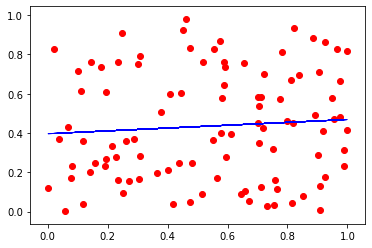

In [15]:
#obliczenie wartosci a (suma iloczynu roznic X - avg_X oraz Y - avg_Y) podzielona przez kwadrat roznic X - avg_X
A = result_df['Iloczyn_roznic'].sum() / result_df['Kwadrat_roznic_X'].sum()
print('A: ', A)
B = avg_Y - A * avg_X
print('B:', B)

plt.scatter(numbers[0,:], numbers[1,:],  color='red')
plt.plot(numbers[0,:], A * numbers[0,:] + B, color='blue', linewidth=1)
plt.show()

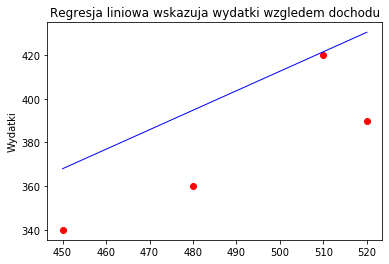

In [16]:
data = {'Dochody':[210, 270, 290, 310, 370, 400, 450, 480, 510, 520], 
        'Wydatki':[140, 190, 250, 270, 290, 310, 340, 360, 420, 390]}

df = pd.DataFrame(data)
dochody = df.Dochody
wydatki = df.Wydatki

regr = linear_model.LinearRegression()
regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))
        
plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa wskazuja wydatki wzgledem dochodu')
plt.ylabel('Wydatki')
plt.show()